<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados** 

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [2]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

import lxml

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

fonte = BeautifulSoup(open(NOME_ARQUIVO_FONTE, mode='r'), 'lxml')


In [3]:
# visualize os resultados


fonte

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [4]:
# manipule os dados

estados_limpo = []

name_column = ['estado', 'sigla', 'regiao']

tabela = fonte.find_all('estado')

for linha in tabela:
  estados_limpo.append([
      
      linha.get_text().strip().split('\n')[1],
      linha.get_text().strip().split('\n')[3],
      linha.get_text().strip().split('\n')[4]
  ])

estados_limpo.insert(0 , name_column)

print(estados_limpo)

[['estado', 'sigla', 'regiao'], ['ACRE', 'AC', 'NORTE'], ['ALAGOAS', 'AL', 'NORDESTE'], ['AMAPA', 'AP', 'NORTE'], ['AMAZONAS', 'AM', 'NORTE'], ['BAHIA', 'BA', 'NORDESTE'], ['CEARA', 'CE', 'NORDESTE'], ['DISTRITO FEDERAL', 'DF', 'CENTRO-OESTE'], ['ESPIRITO SANTO', 'ES', 'SUDESTE'], ['GOIAS', 'GO', 'CENTRO-OESTE'], ['MARANHAO', 'MA', 'NORDESTE'], ['MATO GROSSO', 'MT', 'CENTRO-OESTE'], ['MATO GROSSO DO SUL', 'MS', 'CENTRO-OESTE'], ['PARA', 'PA', 'NORTE'], ['PARAIBA', 'PB', 'NORDESTE'], ['PARANA', 'PR', 'SUL'], ['PERNAMBUCO', 'PE', 'NORDESTE'], ['PIAUI', 'PI', 'NORDESTE'], ['RIO DE JANEIRO', 'RJ', 'SUDESTE'], ['RIO GRANDE DO NORTE', 'RN', 'NORDESTE'], ['RIO GRANDE DO SUL', 'RS', 'SUL'], ['RONDONIA', 'RO', 'NORTE'], ['RORAIMA', 'RR', 'NORTE'], ['SANTA CATARINA', 'SC', 'SUL'], ['SAO PAULO', 'SP', 'SUDESTE'], ['SERGIPE', 'SE', 'NORDESTE'], ['TOCANTINS', 'TO', 'NORTE'], ['MINAS GERAIS', 'MG', 'SUDESTE']]


In [5]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

import csv

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

with open(file= NOME_ARQUIVO_DESTINO, mode='w', encoding='utf8') as arquivo:
  escritor_csv = csv.writer(arquivo, delimiter=';')
  escritor_csv.writerows(list(map(lambda x: x, estados_limpo)))


### **1.2. Cidades** 

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [6]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

fonte_df = pd.read_csv(NOME_ARQUIVO_FONTE, sep=',', error_bad_lines=False, engine='python')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 2173: field larger than field limit (131072)
Skipping line 2207: field larger than field limit (131072)
Skipping line 2817: field larger than field limit (131072)


In [7]:
# visualize os resultados
fonte_df.describe().T

# continue o codigo aqui

,count,mean,std,min,25%,50%,75%,max
gid,5563.0,2785.769189,1.607256e+03,1.000000,1394.500000,2786.000000,4177.500000,5.568000e+03
Censo,5557.0,2009.997301,8.995590e-02,2007.000000,2010.000000,2010.000000,2010.000000,2.010000e+03
PIB,5563.0,582198.466478,6.347513e+06,5770.282227,38418.294922,80588.132812,206221.179688,3.893172e+08
Pop_est_2009,5563.0,34402.359698,2.018375e+05,837.000000,5338.000000,11200.000000,23247.500000,1.103759e+07
PIB_percapita,5563.0,10979.003452,1.215229e+04,1929.969971,4518.704834,8394.969727,13317.935059,3.608158e+05
classe,5563.0,1.521481,6.712602e-01,1.000000,1.000000,1.000000,2.000000,5.000000e+00


In [ ]:
# manipule os dados

In [8]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 6.7 MB/s 


In [9]:
from numpy import unicode_
from operator import index
from unidecode import unidecode

#Selecionando colunas do fonte_Df
cidades_limpo_df = fonte_df.query('Censo == 2010')[['UF', 'nome', 'PIB', 'Pop_est_2009', 'PIB_percapita']]

#Renomeando colunas e tirando acentuação
cidades_limpo_df.rename(columns= {'UF':'estado',
                                  'nome':'cidade',
                                  'PIB':'pib',
                                  'Pop_est_2009':'pop_est_2009', 
                                  'PIB_percapita':'pib_percapita'}, inplace= True)


cidades_limpo_df['estado'] = cidades_limpo_df['estado'].map(lambda x: unidecode(x))



In [10]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

cidades_limpo_df.to_csv(NOME_ARQUIVO_DESTINO, sep=';', index=False)


### **1.3. Brasil** 

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-bruto.csv` com os dados do arquivo `cidades-bruto.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [11]:
# solução do exercício 1.3

fonte_cidades = 'cidades-limpo.csv'

fonte_estados = 'estados-limpo.csv'

NOME_ARQUIVO_DESTINO = 'brasil.csv'

cidades_df = pd.read_csv(fonte_cidades, sep=';')

estados_df = pd.read_csv(fonte_estados, sep=';')

brasil_df = pd.merge(left=cidades_df, right=estados_df, on='estado', how='outer')

brasil_df.to_csv(NOME_ARQUIVO_DESTINO, sep=';', index=False)


---

## 2\. Data Analytics

### **2.1. DataFrame** 

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [12]:
# solução do exercício 2.1

import pandas as pd

NOME_ARQUIVO_FONTE = 'brasil.csv'

brasil_df = pd.read_csv(NOME_ARQUIVO_FONTE, sep=';')

### **2.2. Analise** 

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [13]:
# código para responder a pergunta

dez_cidades_pop = brasil_df.sort_values(by=['pop_est_2009'], ascending=False).head(10).reset_index(drop=True)
dez_cidades_pop


,estado,cidade,pib,pop_est_2009,pib_percapita,sigla,regiao
0,SAO PAULO,São Paulo,389317152.0,11037593,35271.929688,SP,SUDESTE
1,RIO DE JANEIRO,Rio de Janeiro,175739344.0,6186710,28405.949219,RJ,SUDESTE
2,BAHIA,Salvador,32824228.0,2998056,10948.500000,BA,NORDESTE
3,DISTRITO FEDERAL,Brasília,131487264.0,2606885,50438.460938,DF,CENTRO-OESTE
4,CEARA,Fortaleza,31789186.0,2505552,12687.500000,CE,NORDESTE
5,MINAS GERAIS,Belo Horizonte,44595204.0,2452617,18182.699219,MG,SUDESTE
6,PARANA,Curitiba,45762420.0,1851215,24720.210938,PR,SUL
7,AMAZONAS,Manaus,40486108.0,1738641,23286.060547,AM,NORTE
8,PERNAMBUCO,Recife,24835340.0,1561659,15903.179688,PE,NORDESTE
9,PARA,Belém,16526989.0,1437600,11496.240234,PA,NORTE


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [14]:
# código para responder a pergunta

brasil_df.sort_values(by=['pib'], ascending=True).head(5).reset_index(drop=True)

,estado,cidade,pib,pop_est_2009,pib_percapita,sigla,regiao
0,PIAUI,Santo Antônio dos Milagres,5770.282227,2032,2839.709961,PI,NORDESTE
1,PIAUI,São Miguel da Baixa Grande,7714.598145,2153,3583.189941,PI,NORDESTE
2,GOIAS,Anhanguera,8194.404297,1018,8049.509766,GO,CENTRO-OESTE
3,PARAIBA,Quixabá,8294.528320,1488,5574.279785,PB,NORDESTE
4,PIAUI,Miguel Leão,8365.680664,1212,6902.379883,PI,NORDESTE


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [15]:
# código para responder a pergunta

brasil_df.query('estado == "SAO PAULO"').sort_values(by=['pib'], ascending=False).head(15).reset_index(drop=True)

,estado,cidade,pib,pop_est_2009,pib_percapita,sigla,regiao
0,SAO PAULO,São Paulo,389317152.0,11037593,35271.929688,SP,SUDESTE
1,SAO PAULO,Guarulhos,32473828.0,1299283,24993.650391,SP,SUDESTE
2,SAO PAULO,Campinas,31654720.0,1064669,29731.980469,SP,SUDESTE
3,SAO PAULO,Osasco,31616452.0,718646,43994.468750,SP,SUDESTE
4,SAO PAULO,São Bernardo do Campo,28935768.0,810979,35680.050781,SP,SUDESTE
5,SAO PAULO,Barueri,26908070.0,270173,99595.703125,SP,SUDESTE
6,SAO PAULO,Santos,22546134.0,417098,54054.761719,SP,SUDESTE
7,SAO PAULO,São José dos Campos,22018042.0,615871,35751.058594,SP,SUDESTE
8,SAO PAULO,Jundiaí,16585137.0,349929,47395.718750,SP,SUDESTE
9,SAO PAULO,Santo André,14709603.0,673396,21843.910156,SP,SUDESTE


 - Qual é o PIB do estado de Santa Catarina?

In [16]:
# código para responder a pergunta

brasil_df[['estado','pop_est_2009']].query('estado == "SANTA CATARINA"').groupby('estado').agg('sum').T

estado,SANTA CATARINA
pop_est_2009,6118743


 - Qual é o população da região sul?

In [17]:
# código para responder a pergunta

brasil_df[['regiao','pop_est_2009']].query('regiao == "SUL"').groupby('regiao').agg('sum').T

regiao,SUL
pop_est_2009,27719118


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [18]:
# código para responder a pergunta

brasil_df[['estado','pib_percapita']].query('estado == "MATO GROSSO DO SUL"').groupby('estado').agg('mean').T

estado,MATO GROSSO DO SUL
pib_percapita,14458.89686


 - Qual é a população do Brasil?

In [19]:
# código para responder a pergunta

brasil_df['pop_est_2009'].agg('sum')

191055055

### **2.3. Visualização** 

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

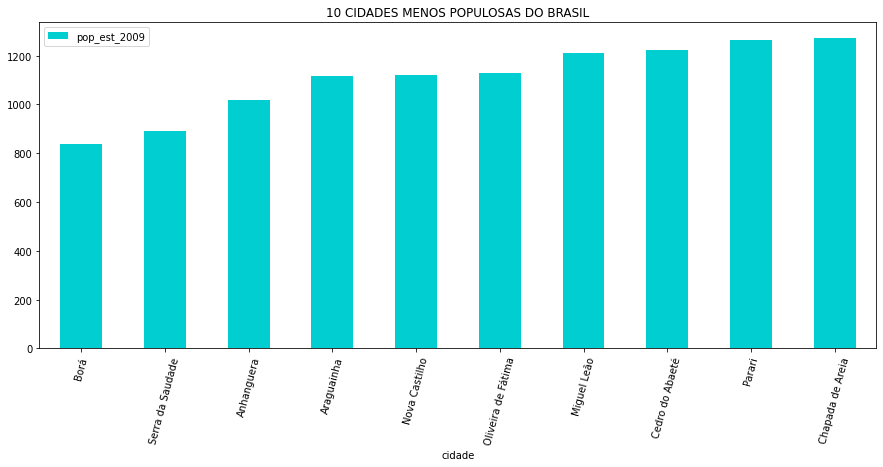

In [47]:

# código para gerar a visualização

import numpy as np
import matplotlib.pyplot as plt

dez_menos = brasil_df[['cidade', 'pop_est_2009']].sort_values(by=['pop_est_2009'], ascending=True).head(10).reset_index(drop=True)


dez_menos.plot.bar(x='cidade', y='pop_est_2009', rot=75, figsize=(15, 6), color="#00CED1", title="10 CIDADES MENOS POPULOSAS DO BRASIL")

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

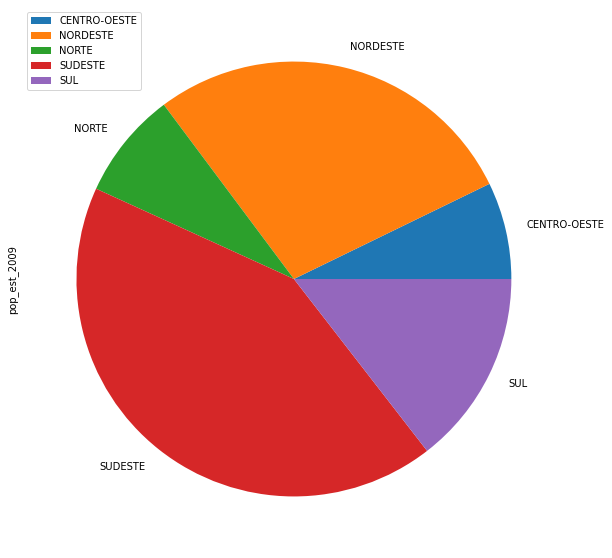

In [51]:
# código para gerar a visualização

pop_brasil = brasil_df[['regiao', 'pop_est_2009']].groupby('regiao').agg('sum')

pop_brasil.plot.pie(y='pop_est_2009', figsize=(15, 10))